### Gradient Descent Algorithm
***
Before we run gradient descent algorithm, we need to design the hypothesis and [loss function](https://en.wikipedia.org/wiki/Loss_function).
 - Hypothesis : $$y = b + wx$$ 
 - Loss Function :$$L(\theta) = \frac{1}{2N}\sum\limits_{i=1}^{N}(\hat{y}_i - (b + wx_i))^2$$

We hope our hypothesis can fit the set of points better, so the loss must be smaller.
Therefore, it can consider as an optimization problem.

 - optimization : $$ \theta^*\ =\ arg \min_{\theta}L(\theta)$$ 
 
 
Calculate partial differential of parameter: 
 1. $$\frac{\partial L}{\partial W} = \frac{1}{N}\sum\limits_{i = 1}^{N}(\hat{y}_i-(b + wx_i))(-x_i)$$
 2. $$\frac{\partial L}{\partial b} = \frac{1}{N}\sum\limits_{i = 1}^{N}(\hat{y}_i-(b + wx_i))(-1)$$

Update Parameter (n denote number of iteration):
 - Repeat : $$\left\{\begin{aligned}w^n\ =\ w^{n-1}\ -\ \tau\frac{\partial L}{\partial W} \\ b^{n}\ =\ b^{n-1}\ -\ \tau\frac{\partial L}{\partial W}\end{aligned}\right.$$


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# implemetation 

class gradient_descent():
    def __init__(self, num_iteration, learning_rate):
        self.numIteration = num_iteration # setting number of iteration
        self.learningRate = learning_rate # setting learning rate
        
    def compute_error(self, y, x, theta):
        error = np.sum((y - np.dot(theta, x.transpose()))**2)/(2*len(y)) # Cost function
        return(error)
    
    def add_bias_feature(self, x):
        adding = np.ones(x.shape[0])
        new_x = np.column_stack(tup = (adding, x)) 
        return(new_x)
        
    def calculate_gradient(self, y, x, rand_seed): # hypothesis => y = b + wx
        
        x = self.add_bias_feature(x)
        xTrans = x.transpose()
        
        np.random.seed(seed = rand_seed)
        theta = np.random.normal(loc = 0, scale = 1, size = x.shape[1]) # initialize theta
        theta_history = np.zeros(shape = (self.numIteration, x.shape[1]))
        error_history = np.zeros(shape = self.numIteration)
        
        for num in range(self.numIteration):
            
            gradient = np.dot(xTrans, (y - np.dot(theta, xTrans)))/(-len(y)) 
            
            theta = (theta - self.learningRate * gradient.flatten()) # update parameter
            
            theta_history[num] = theta
            error_history[num] = self.compute_error(y, x, theta)
            # Calculate error after updating the parameters.
            
        return(theta_history, error_history)

In [3]:
df = np.genfromtxt(fname = "data.csv", delimiter = ',')
y, x = df[:, 0], df[:, 1]

num_iter = 1000
learning_rate = 10**(-5)

gd = gradient_descent(num_iteration = num_iter, learning_rate = learning_rate)
parameter, err = gd.calculate_gradient(y, x, rand_seed = 123)

In [4]:
bias = parameter[:, 0]
slope = parameter[:, 1]

In [5]:
class vis_gradient():
    %matplotlib notebook
    
    def __init__(self, x, y, bias, slope, error, num_iter):
        self.x = x
        self.y = y
        self.bias = bias
        self.slope = slope
        self.error = error
        self.num_iter = num_iter
        
    def iteration_error(self):
        
        experiment_times = np.arange(1, self.num_iter + 1)

        text_font = {'family': 'serif', 'style': 'italic', 'color': 'blue', 'weight': 'normal', 'size': 10}

        fig, ax = plt.subplots()
        scat, = ax.plot([], [], marker = 'o', color = 'r')
        iter_text = ax.text(x = experiment_times[-1]*0.7, y = np.max(self.error)*0.7, s = '', fontdict = text_font)
        err_text = ax.text(x = experiment_times[-1]*0.7, y = np.max(self.error)*0.6, s = '', fontdict = text_font)
        ax.set_xlim(-20, self.num_iter)
        ax.set_ylim(0, np.max(self.error) + np.max(self.error)*0.1)
        ax.set_ylabel(ylabel = '$error$')
        ax.set_xlabel(xlabel = '$Number\ of\ Iteration$')
        ax.set_title(label = '$Gradent\ Descent$')
        
        def init():
            scat.set_data([], [])
            iter_text.set_text("")
            err_text.set_text("")
            return scat, iter_text, err_text

        def animate(i, temp_x = [], temp_y = []):

            temp_x.append(experiment_times[i])
            temp_y.append(self.error[i])

            scat.set_xdata(temp_x)
            scat.set_ydata(temp_y)
            iter_text.set_text(s = ("Iteration = %s" % (experiment_times[i])))
            err_text.set_text(s = ("error = %.5f" % (self.error[i])))

            if len(temp_x) == self.num_iter:
                del temp_x[:], temp_y[:]

            return scat, iter_text, err_text

        ani = animation.FuncAnimation(fig = fig, func = animate, frames = self.num_iter, 
                                      init_func = init, interval = 10, blit = True)
        return ani
    
    def fit_process(self):
        
        fig, ax = plt.subplots(ncols = 1, nrows = 1)

        plot_x = np.arange(1, self.num_iter + 1 )

        trans_y = [self.bias[num] + self.slope[num]*plot_x for num in range(num_iter)]

        font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 14}

        line, = ax.plot([], [], c = 'r')
        fun_text = ax.text(x = 40, y = 110, s = (r'$y\ =\ %.2f\ +\ %.2fx$' % (self.bias[0], self.slope[0])), fontdict = font)
        ax.set_ylim(bottom = -50, top = 125)
        ax.set_title(label = 'Gradent Descent', fontdict = font)
        ax.scatter(self.x, self.y, color = 'b')

        def animate(i):
            fun_text.set_text(r'$y\ =\ %.7f\ +\ %.7fx$' % (self.bias[i], self.slope[i]))
            line.set_ydata(trans_y[i])
            line.set_xdata(plot_x)
            return fun_text, line

        def init():
            fun_text.set_text("")
            line.set_data([], [])
            return fun_text, line

        ani = animation.FuncAnimation(fig = fig, func = animate, init_func = init, frames = num_iter,
                                      interval = 100, blit = True)
        return ani
    
    def gradent_search(self):
        
        title_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 15}
        text_font = {'family': 'serif', 'style': 'italic', 'color': 'blue', 'weight': 'normal', 'size': 12}

        fig, ax = plt.subplots(nrows = 1, ncols = 1)
        scat, = ax.plot(self.bias[0], self.slope[0], linestyle = '', marker = 'o', color = 'r')
        slope_text = ax.text(x = -1.14, y = 0.6, s = '', fontdict = text_font)
        bias_text = ax.text(x = -1.14, y = 0.8, s = '', fontdict = text_font)
        iter_text = ax.text(x = -1.14, y = 1, s = '', fontdict = text_font)
        ax.set_ylabel(r'$Slope\ \theta_1$')
        ax.set_xlabel(r"$Bias\ \theta_0$")
        ax.set_title("Grandent Search", fontdict = title_font)
        ax.set_ylim(0, 1.2)

        def init():
            scat.set_data([], [])
            bias_text.set_text('')
            slope_text.set_text('')
            iter_text.set_text('')
            return scat, iter_text, bias_text, slope_text

        def animate(i, temp_x = [], temp_y = []):

            temp_x.append(self.bias[i])
            temp_y.append(self.slope[i])

            scat.set_xdata(temp_x)
            scat.set_ydata(temp_y)
            iter_text.set_text('iteration = %d' % i)
            bias_text.set_text('bias = %.7f' % self.bias[i])
            slope_text.set_text('slope = %.7f' % self.slope[i])

            if len(temp_x) == self.num_iter:
                del temp_x[:], temp_y[:]

            return scat, iter_text, bias_text, slope_text


        ani = animation.FuncAnimation(fig = fig, func = animate, frames = num_iter, init_func = init, 
                                      interval = 50, repeat = True)
        return ani

<IPython.core.display.Javascript object>


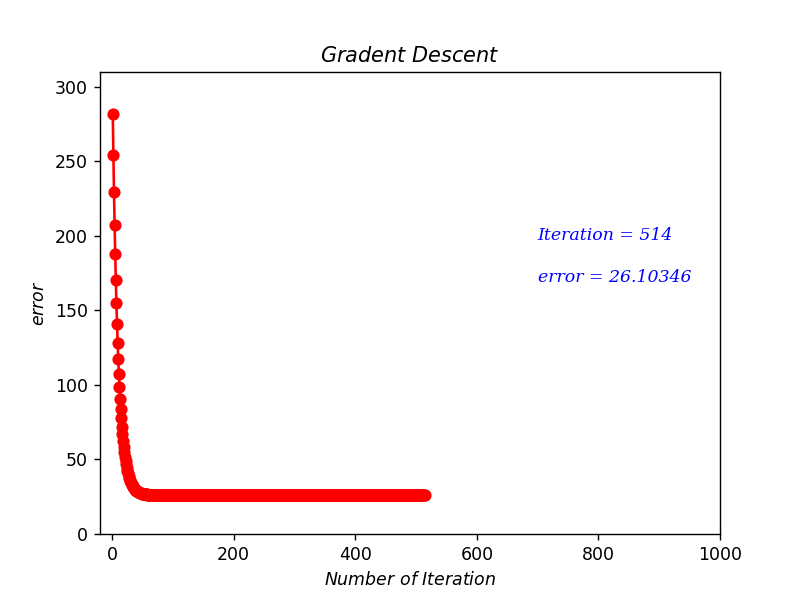

In [6]:
vis = vis_gradient(x = x, y = y, bias = bias, slope = slope, error = err, num_iter = num_iter)
vis.iteration_error()

<IPython.core.display.Javascript object>


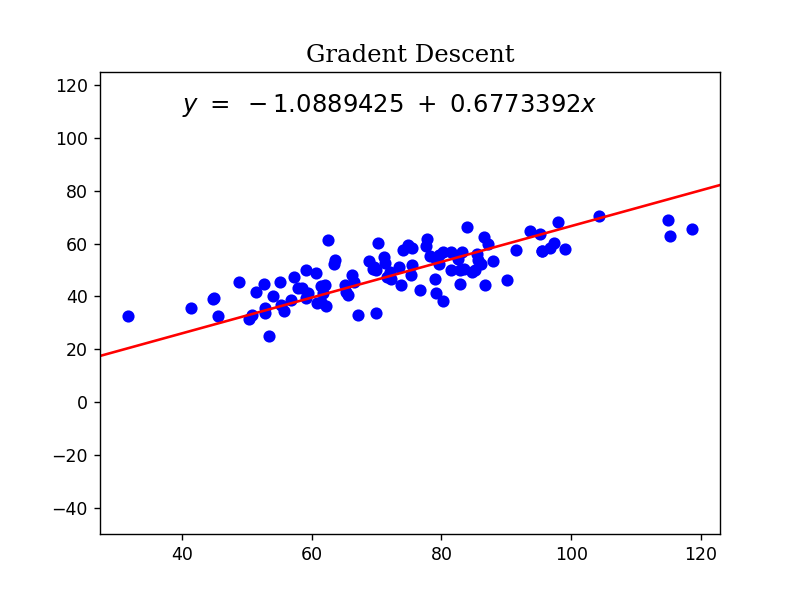

In [7]:
vis.fit_process()

<IPython.core.display.Javascript object>


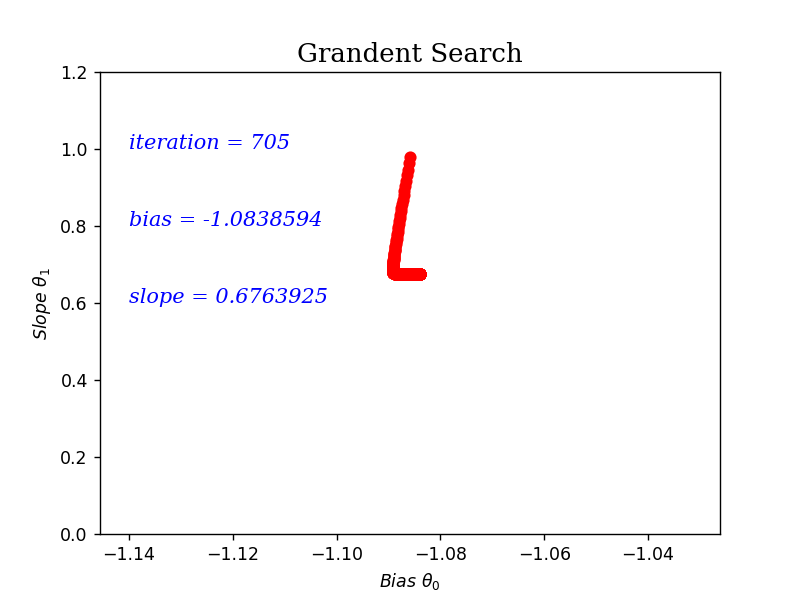

In [8]:
vis.gradent_search()